In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv("/content/video_game_sales.csv")
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


Let's get some information from the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Let's first look at the top 100 video games

In [13]:
df1 =  df.sort_values(by="Global_Sales", ascending=False)
top_100 = df1.head(10)
top_100


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


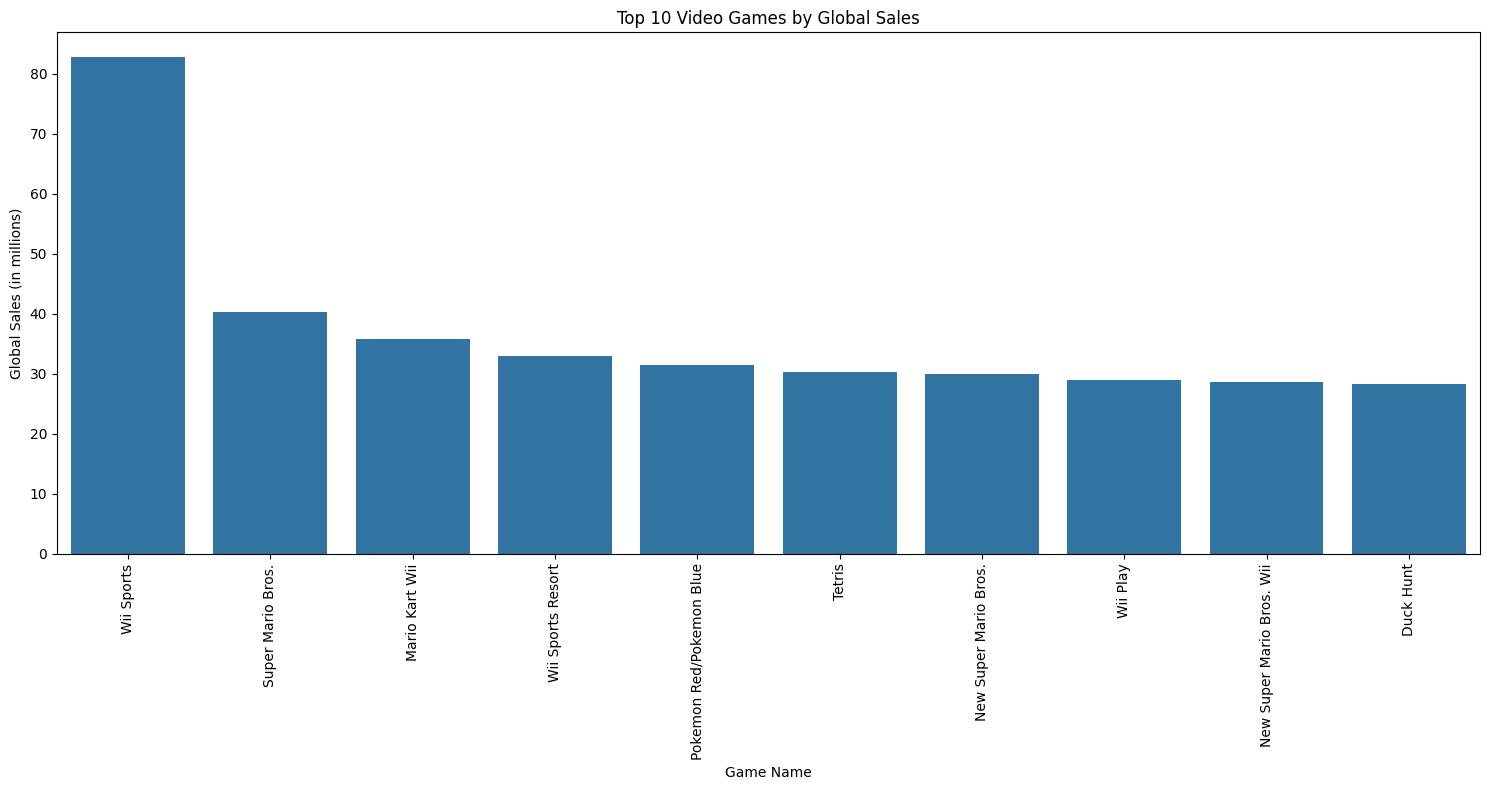

In [15]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Name", y="Global_Sales", data=top_100.head(20)) # Showing top 20 for better readability
plt.xticks(rotation=90)
plt.title("Top 10 Video Games by Global Sales")
plt.xlabel("Game Name")
plt.ylabel("Global Sales (in millions)")
plt.tight_layout()
plt.show()

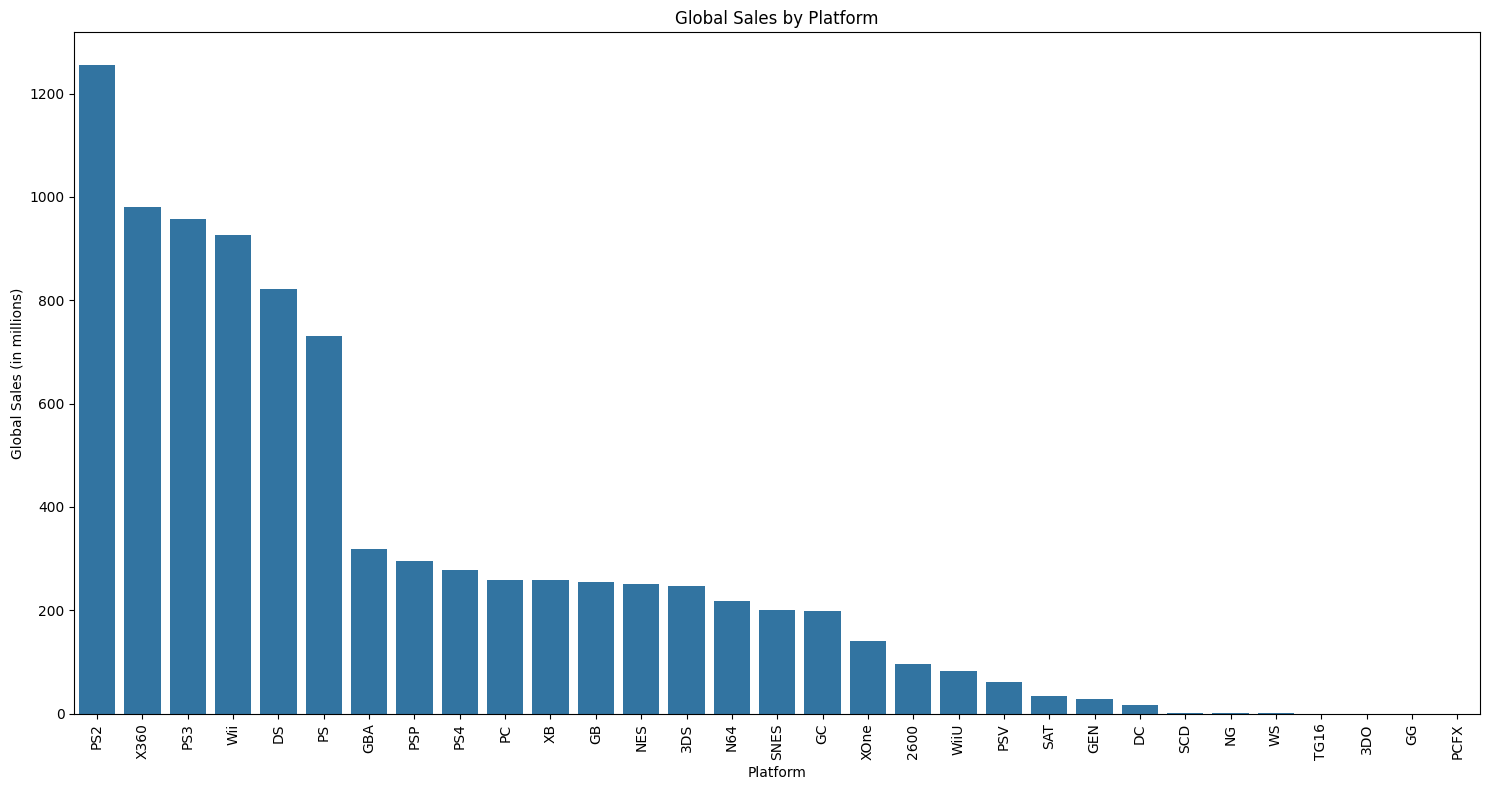

In [17]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x=platform_sales.index, y=platform_sales.values)
plt.xticks(rotation=90)
plt.title("Global Sales by Platform")
plt.xlabel("Platform")
plt.ylabel("Global Sales (in millions)")
plt.tight_layout()
plt.show()

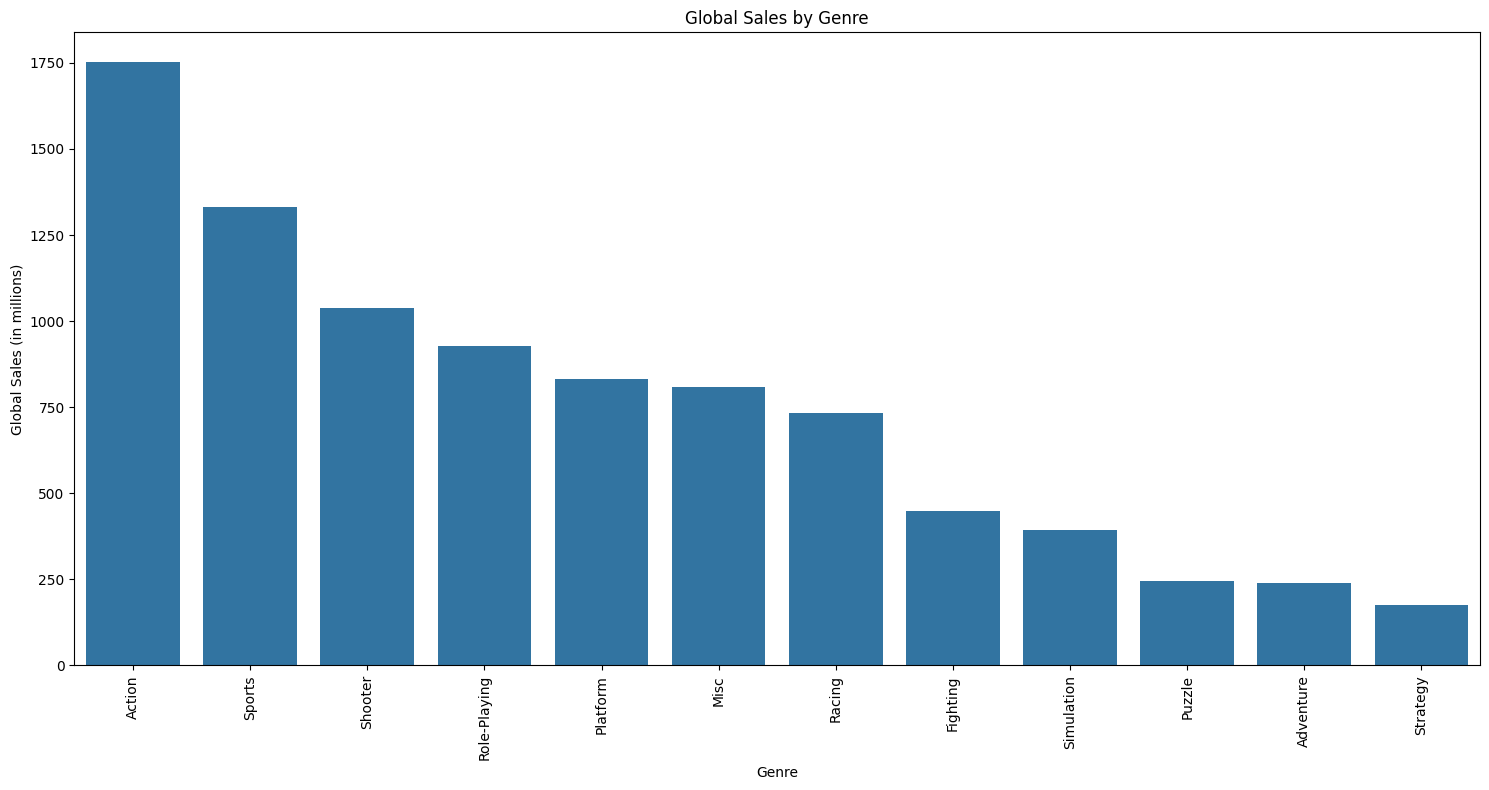

In [16]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.xticks(rotation=90)
plt.title("Global Sales by Genre")
plt.xlabel("Genre")
plt.ylabel("Global Sales (in millions)")
plt.tight_layout()
plt.show()

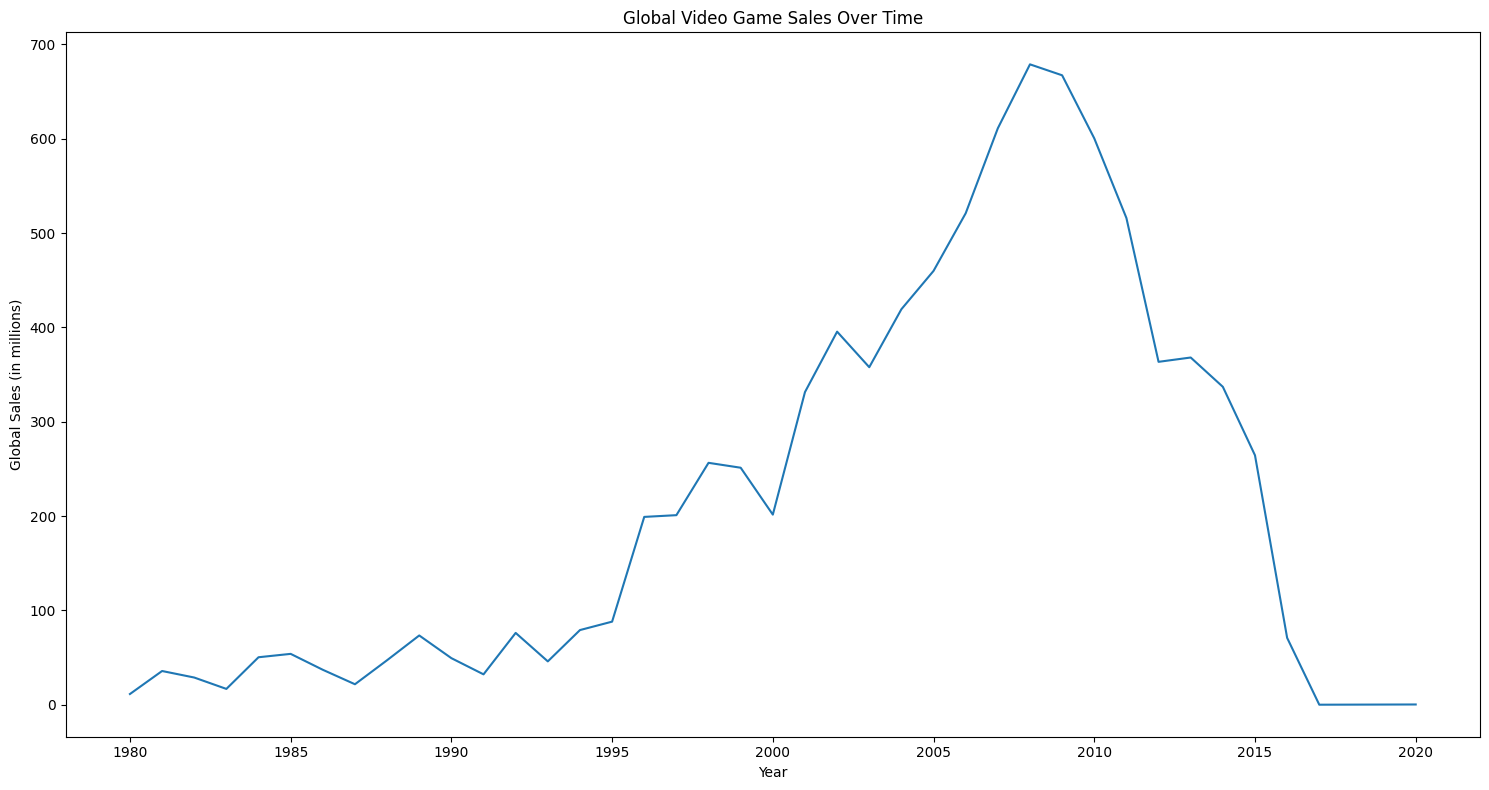

In [21]:
# Drop rows with missing year values
df_yearly_sales = df.dropna(subset=['Year']).copy()

# Convert 'Year' column to integer
df_yearly_sales['Year'] = df_yearly_sales['Year'].astype(int)

# Group by year and sum global sales
yearly_sales = df_yearly_sales.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(15, 8))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title("Global Video Game Sales Over Time")
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")
plt.tight_layout()
plt.show()

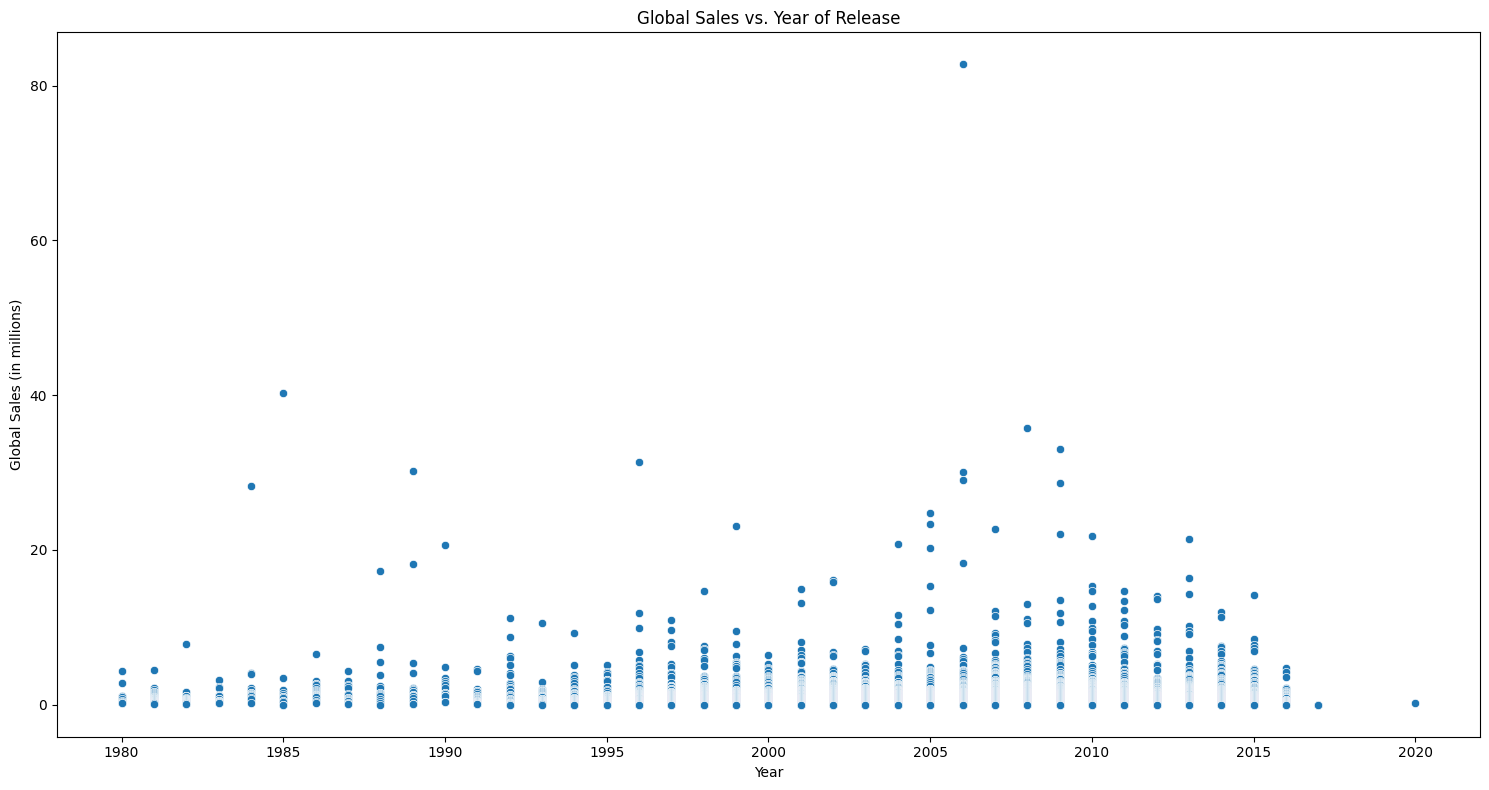

In [22]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Year', y='Global_Sales', data=df_yearly_sales)
plt.title("Global Sales vs. Year of Release")
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")
plt.tight_layout()
plt.show()

Here are some conclusions we can take from that:

Top Games: The top-selling games globally are primarily Nintendo titles, with "Wii Sports" being a significant outlier.

Sales by Genre: Action, Sports, and Shooter are the most popular genres in terms of global sales.

Sales by Platform: The PlayStation (PS2, PS3, PS4) and Xbox (X360, XB, XOne) platforms, along with Nintendo's Wii and DS, have generated the highest global sales.

Sales Over Time: Global video game sales show a general upward trend from the 1980s, peaking around 2008-2009, and then experiencing a decline and stabilization.